1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd

m=3
n=4000

x1=np.random.normal(0,1,n)
x2=x1+np.random.normal(0,3,n)
x3=2*x1+x2

data= np.zeros((m,n))
data[0]=x1
data[1]=x2
data[2]=x3

#print(data)

cov_matrix=np.cov(data)

#eigenvectors and eigenvalues of the covariance matrix of the dataset

l, V = la.eig(cov_matrix)

#ordering: the bigger before
idx = l.argsort()[::-1]   
l = l[idx]
V = V[:,idx]

print('Eigenvalues and eigenvectors with la.eig: \n', l,'\n', V)


U, spectrum, Vt = la.svd(data)

#print(U.shape, spectrum.shape,Vt.shape) #spectrum: min(m,n)


D = np.zeros((m, n))
for i in range(min(m, n)):
    D[i, i] = spectrum[i]
    
SVD = np.dot(U, np.dot(D, Vt))

#print(np.allclose(SVD, data)) #SVD works!

#The columns of U (left-singular vectors) are eigenvectors of  𝐴 𝐴𝑇 .
#The non-zero elements of D are the square roots of the non-zero eigenvalues of  𝐴𝑇𝐴

eval_SVD=pow(spectrum,2)/(n-1)
print('\n', 'Eigenvalues and eigenvectors with SVD: \n', eval_SVD)
for i in range(3):
    print(U[:,i])



Eigenvalues and eigenvectors with la.eig: 
 [2.68340617e+01+0.j 2.01611845e+00+0.j 8.83927165e-16+0.j] 
 [[-0.11867818  0.56502108 -0.81649658]
 [-0.57332849 -0.71037158 -0.40824829]
 [-0.81068485  0.41967059  0.40824829]]

 Eigenvalues and eigenvectors with SVD: 
 [2.68340783e+01 2.01730655e+00 8.65848309e-32]
[-0.11867498 -0.57333252 -0.81068247]
[ 0.56502175 -0.71036832  0.41967519]
[-0.81649658 -0.40824829  0.40824829]


Results are not the same:

-Eigenvector matrix have to be transposed (values are correct)

-The third eigenvalue has a difference of 16 orders of magnitude. However, this difference is not so important, because we can consider the values both close to 0.

Only 2 of 3 feaures are significant, because the third is created as a linear combination of the first and the second. We need only 2 of them when reducing.

In [2]:
#reduction of the dataset

#What percent of the total dataset's variability is explained by the principal components?

Lambda=np.diag(l)

#print (Lambda)
print ("datacov.trace():", cov_matrix.trace())
print ("Lambda.trace():", Lambda.trace(),'\n')

print (Lambda[0,0]/Lambda.trace(), '% total variability, first component')
print (Lambda[1,1]/Lambda.trace(), '% total variability, second component')
print (Lambda[2,2]/Lambda.trace(), '% total variability, third component')



datacov.trace(): 28.850180104214953
Lambda.trace(): (28.850180104214978+0j) 

(0.9301176476611013+0j) % total variability, first component
(0.06988235233889888+0j) % total variability, second component
(3.063853194393269e-17+0j) % total variability, third component


If I reduce the dimensionality of the system from 3 to 2, keeping features 1 and 2 as seen above (this makes sense: feature 3 is a linear combination of them!) over the 99% of the total variability is retained.

(2, 4000)


C:\Users\Elena\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-30.0, 30.0)

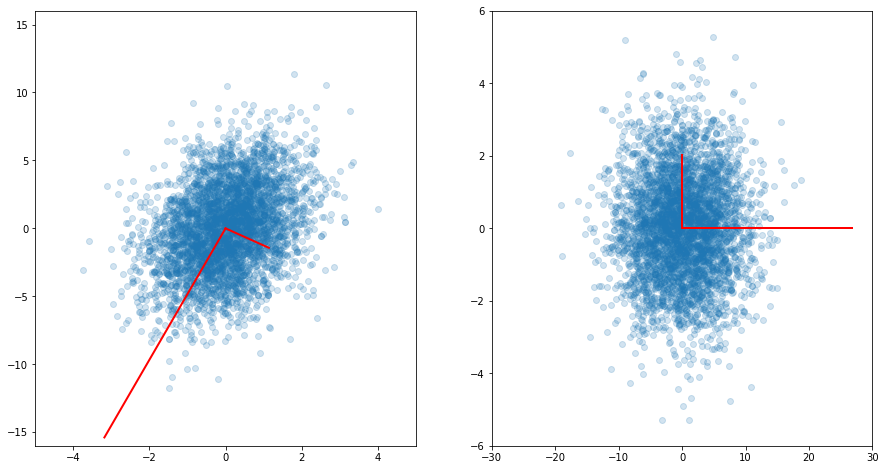

In [3]:
#Redefine the data in the basis yielded by the PCA procedure

cov_matrix=np.cov(data)
l, V = la.eig(cov_matrix)

#ordering: the bigger before
idx = l.argsort()[::-1]   
l = l[idx]
V = V[:,idx]

#V.T has eigenvectors as columns!
data_rot=np.dot(V.T, data) #rotated in the new basis


data_red=np.delete(data_rot,2,axis=0)
print(data_red.shape)

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))


ax1.scatter(data[0,:], data[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    ax1.plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax1.set_ylim(-16,16)
ax1.set_xlim(-5,5)
    
ax2.scatter(data_rot[0,:], data_rot[1,:], alpha=0.2)
for li, vi in zip(l,np.diag([1]*2)):
    ax2.plot([0, li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax2.set_ylim(-6,6)
ax2.set_xlim(-30,30)

Text(0, 0.5, 'feature 3')

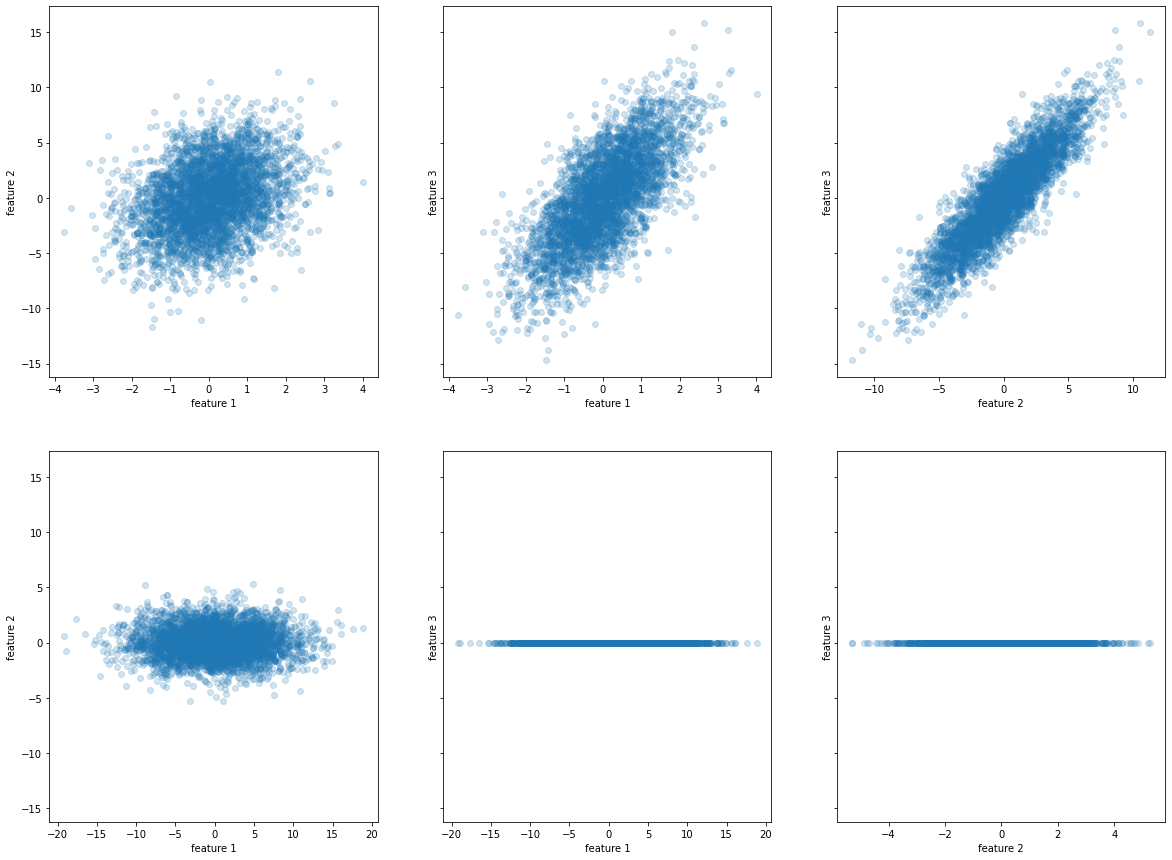

In [4]:
#Plot the data points in the original and the new coordiantes as a set of scatter plots.

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(20,15), sharey=True)

ax1.scatter(data[0,:], data[1,:], alpha=0.2) #original coordinates
ax2.scatter(data[0,:], data[2,:], alpha=0.2)
ax3.scatter(data[1,:], data[2,:], alpha=0.2)

ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')

ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 3')

ax3.set_xlabel('feature 2')
ax3.set_ylabel('feature 3')

ax4.scatter(data_rot[0,:], data_rot[1,:], alpha=0.2) #new coordinates
ax5.scatter(data_rot[0,:], data_rot[2,:], alpha=0.2)
ax6.scatter(data_rot[1,:], data_rot[2,:], alpha=0.2)

ax4.set_xlabel('feature 1')
ax4.set_ylabel('feature 2')

ax5.set_xlabel('feature 1')
ax5.set_ylabel('feature 3')

ax6.set_xlabel('feature 2')
ax6.set_ylabel('feature 3')

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [5]:
#add noise to data
m=3
n=4000
data= np.zeros((m,n))

x1=np.random.normal(0,1,n)
x2=x1+np.random.normal(0,3,n)
x3=2*x1+x2


noise = np.array([np.random.normal(0,1/50,n) for i in range(10)])
noise = np.sum(noise, axis=0)
print(noise.shape)

data[0]=x1+noise
data[1]=x2+noise
data[2]=x3+noise

#eigenvectors and eigenvalues of the covariance matrix of the dataset
cov_matrix=np.cov(data)
l, V = la.eig(cov_matrix)

#ordering: the bigger before
idx = l.argsort()[::-1]   
l = l[idx]
V = V[:,idx]



(4000,)


In [6]:
#reduction of the dataset

#What percent of the total dataset's variability is explained by the principal components?

Lambda=np.diag(l)

#print (Lambda)
print ("datacov.trace():", cov_matrix.trace())
print ("Lambda.trace():", Lambda.trace(),'\n')

print (Lambda[0,0]/Lambda.trace(), '% total variability, first component')
print (Lambda[1,1]/Lambda.trace(), '% total variability, second component')
print (Lambda[2,2]/Lambda.trace(), '% total variability, third component')


datacov.trace(): 29.95178263393042
Lambda.trace(): (29.951782633930424+0j) 

(0.9341556801253975+0j) % total variability, first component
(0.06575653930718145+0j) % total variability, second component
(8.778056742088915e-05+0j) % total variability, third component


In [7]:
#Redefine the data in the basis yielded by the PCA procedure

#V.T has eigenvectors as columns!
data_rot=np.dot(V.T, data) #rotated in the new basis

data_red=np.delete(data_rot,2,axis=0)
print(data_red.shape)



(2, 4000)


Text(0, 0.5, 'feature 3')

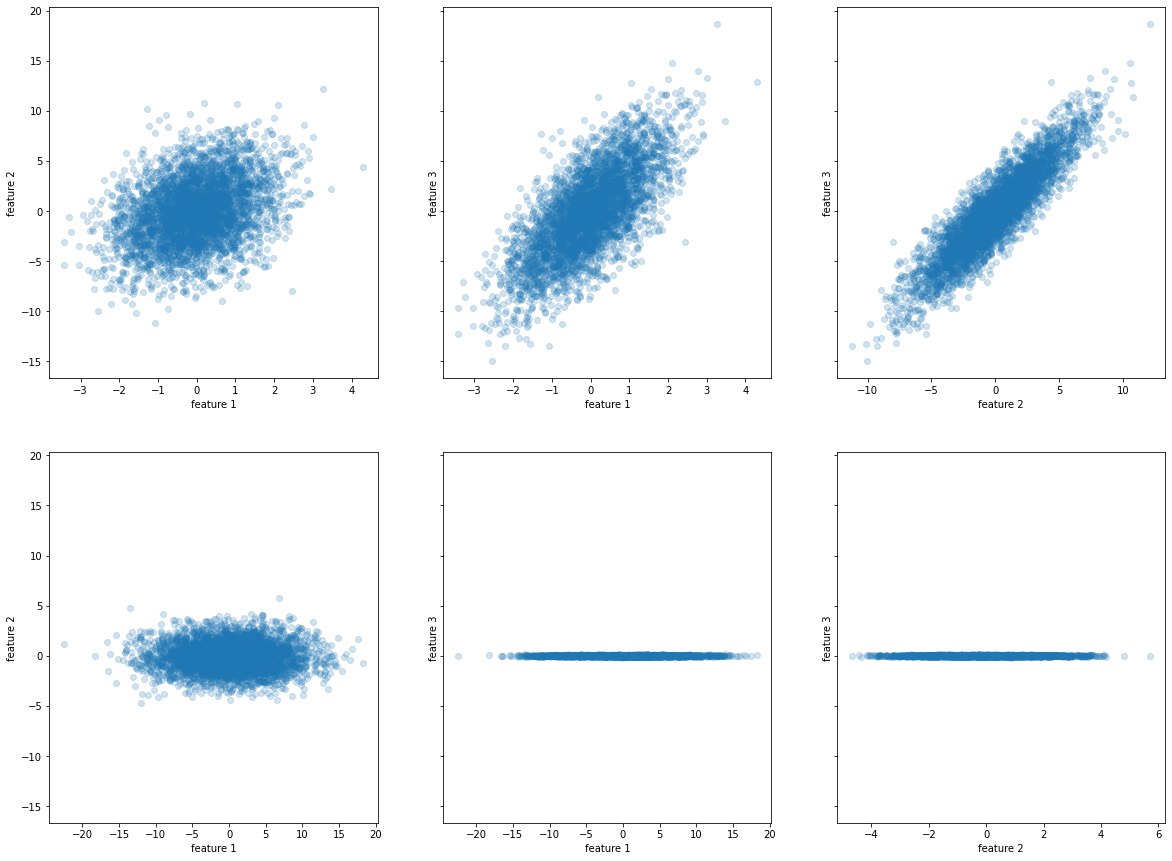

In [8]:
#Plot the data points in the original and the new coordiantes as a set of scatter plots.

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(20,15), sharey=True)

ax1.scatter(data[0,:], data[1,:], alpha=0.2) #original coordinates
ax2.scatter(data[0,:], data[2,:], alpha=0.2)
ax3.scatter(data[1,:], data[2,:], alpha=0.2)

ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')

ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 3')

ax3.set_xlabel('feature 2')
ax3.set_ylabel('feature 3')

ax4.scatter(data_rot[0,:], data_rot[1,:], alpha=0.2) #new coordinates
ax5.scatter(data_rot[0,:], data_rot[2,:], alpha=0.2)
ax6.scatter(data_rot[1,:], data_rot[2,:], alpha=0.2)

ax4.set_xlabel('feature 1')
ax4.set_ylabel('feature 2')

ax5.set_xlabel('feature 1')
ax5.set_ylabel('feature 3')

ax6.set_xlabel('feature 2')
ax6.set_ylabel('feature 3')


The difference with the previous dataset is that the percent of the total dataset's variability explained by the third component is slightly bigger ('only' 5 orders of magnitude smaller instead of 17). The PCA is still significant: dataset is correctly explained with only features 1 and 2.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [9]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 